Postive Review 359
Negative Review 61


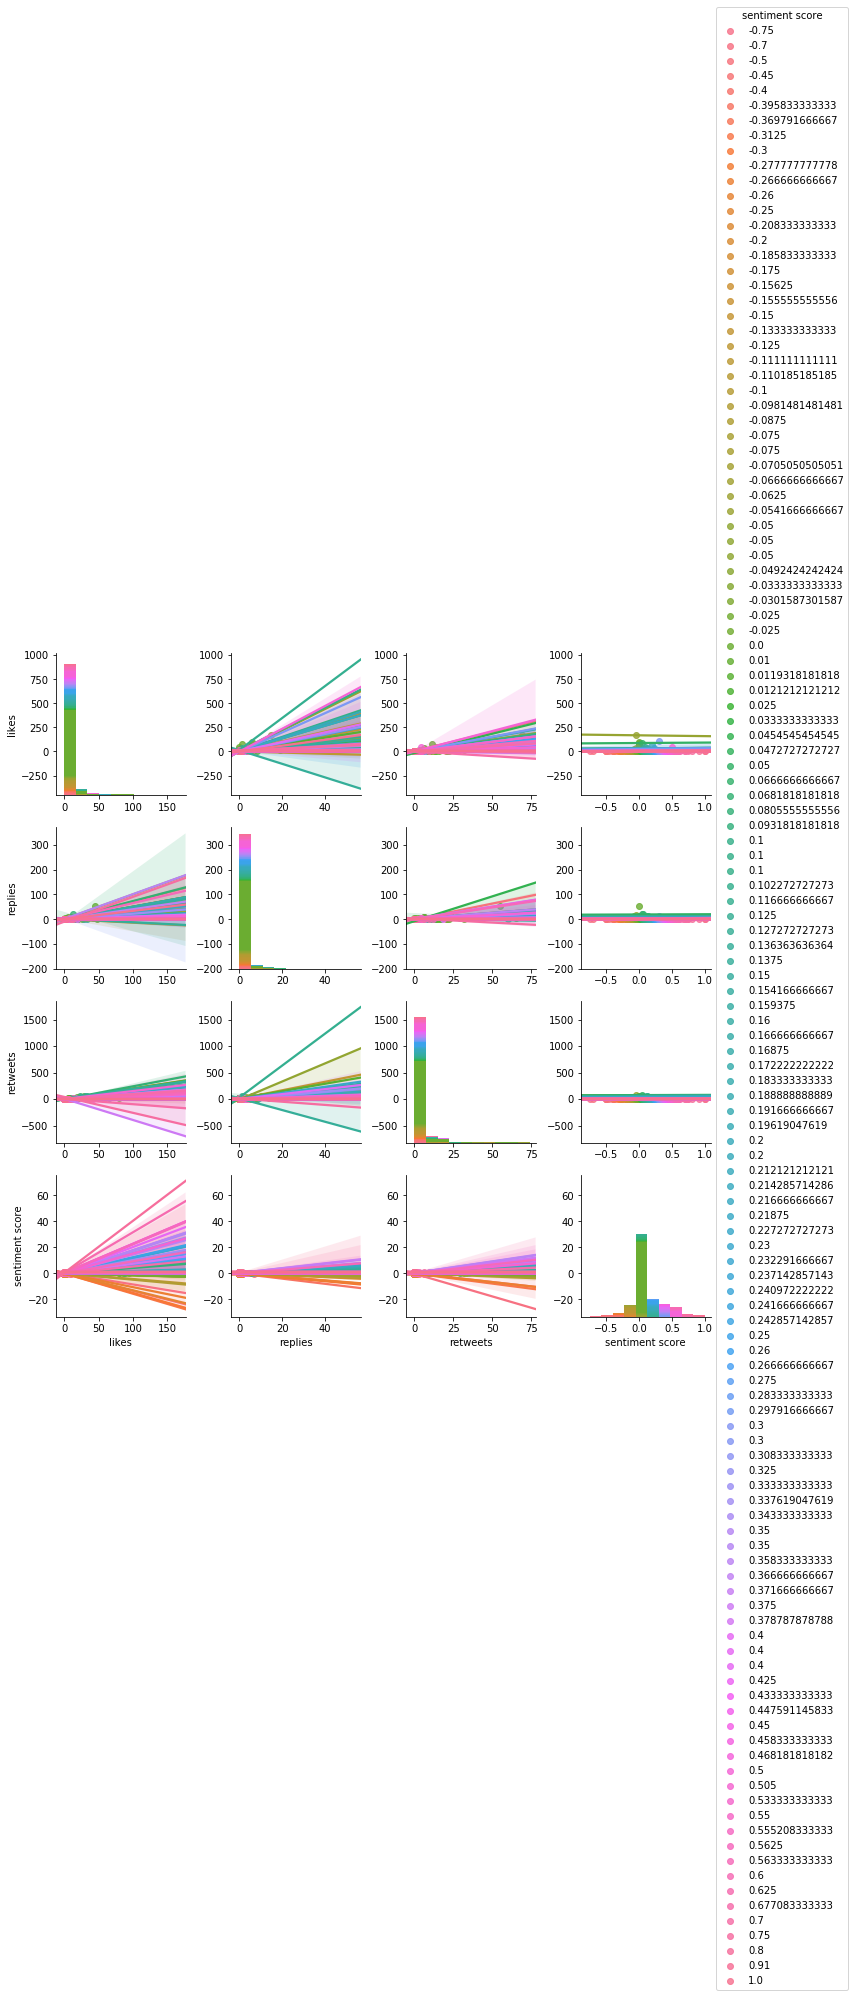

In [10]:
from textblob import TextBlob
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
from sklearn.model_selection import  train_test_split
import plotly
from plotly.graph_objs import Scatter, Layout, Bar
import  seaborn as sns
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)


df= pd.read_json('choleradataset.json')

global positive, negative
global sentiment_Scores



def analyser(df):
    positive,negative=0,0
    sentiment_Scores=[]
    for index,text in enumerate(df['text']):

        sentiment = TextBlob(text).sentiment.polarity

        if (sentiment >= 0):
            sentiment_Scores.append(sentiment)


            positive += 1
        else:
            negative += 1
            sentiment_Scores.append(sentiment)


    df['sentiment score']=sentiment_Scores
    print('Postive Review', positive)
    print('Negative Review', negative)
    plotly.offline.plot({
        "data": [Bar(x=['Positive Tweets','Negative Tweets'], y=[positive,negative])],
        "layout": Layout(title="Twitter Reaction to Date My Family")
    })


analyser(df)


 


sns.pairplot(df[['likes','replies','retweets','sentiment score']],hue='sentiment score',kind='reg')